In [ ]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Exploratory Data Analysis and Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv("/content/train_users_2.csv",parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
df_test = pd.read_csv("/content/test_users.csv",parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
df_train.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [ ]:
df_train.count()

id                         213451
date_account_created       213451
timestamp_first_active     213451
date_first_booking          88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

In this challenge, you are given a list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. 
 

* id: user id
* date_account_created: the date of account creation
* timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
* date_first_booking: date of first booking
* gender
* age
* signup_method
* signup_flow: the page a user came to signup up from
* language: international language preference
* affiliate_channel: what kind of paid marketing
* affiliate_provider: where the marketing is e.g. google, craigslist, other
* first_affiliate_tracked: whats the first marketing the user interacted with  before the signing up
* signup_app
* first_device_type
* first_browser
* country_destination: this is the target variable you are to predict

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [ ]:
df_train.isnull().sum()
#df_train['gender'].value_counts()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [ ]:
df_train.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


In [ ]:
# date_first_booking         
# age
# signup_app                      

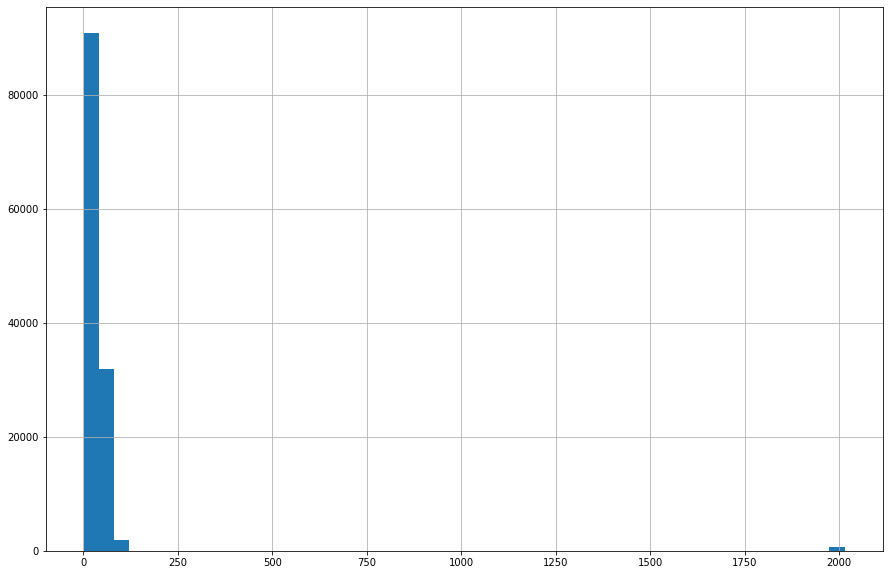

In [ ]:
df_train['age'].hist(bins=50)
# age ranges 5 to 75 and some high outliers of 2000
# age follows a normal distribution neglecting the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


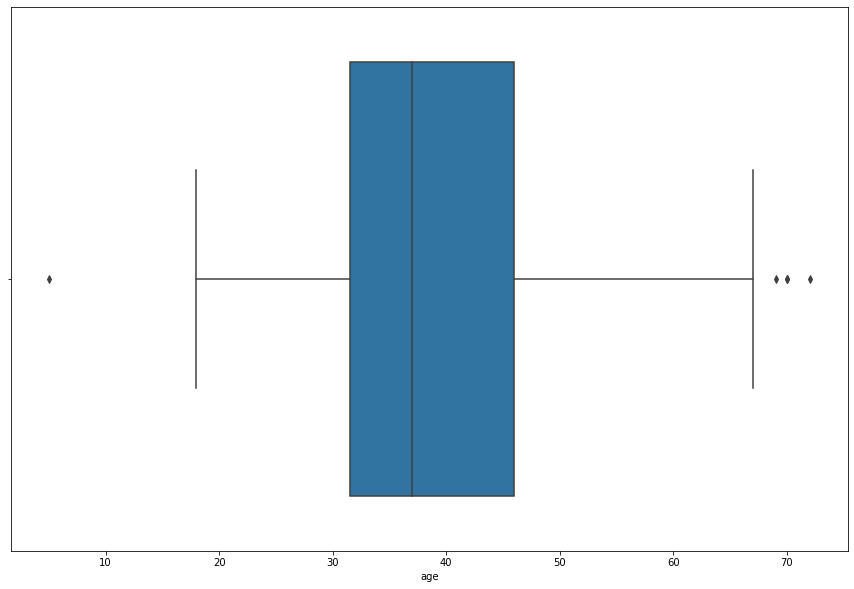

In [ ]:

sns.boxplot(df_train['age'].head(350))

# obvious outliers, values < 17 and > 67

In [ ]:
df_train['age'].isnull().sum()
# 77135 null values out of 190k

87990

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


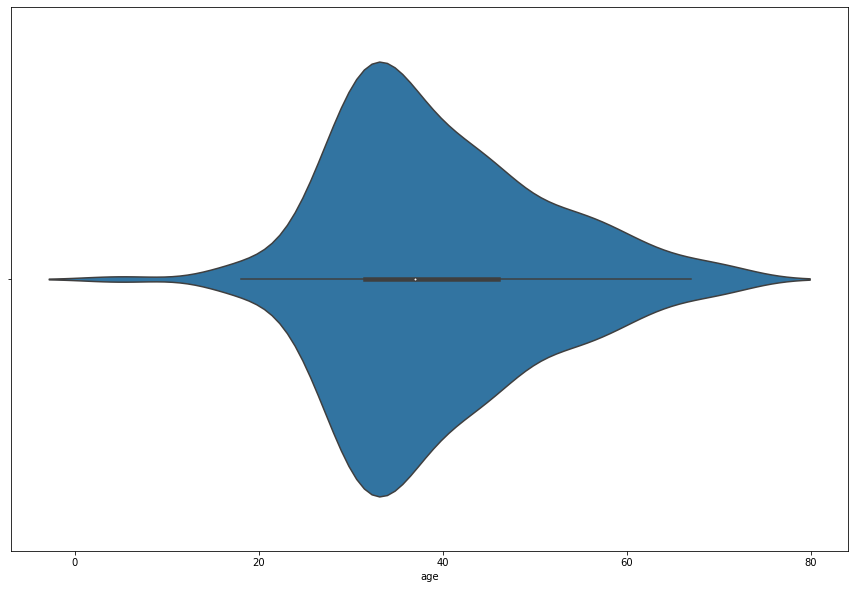

In [ ]:
sns.violinplot(df_train['age'].head(350))

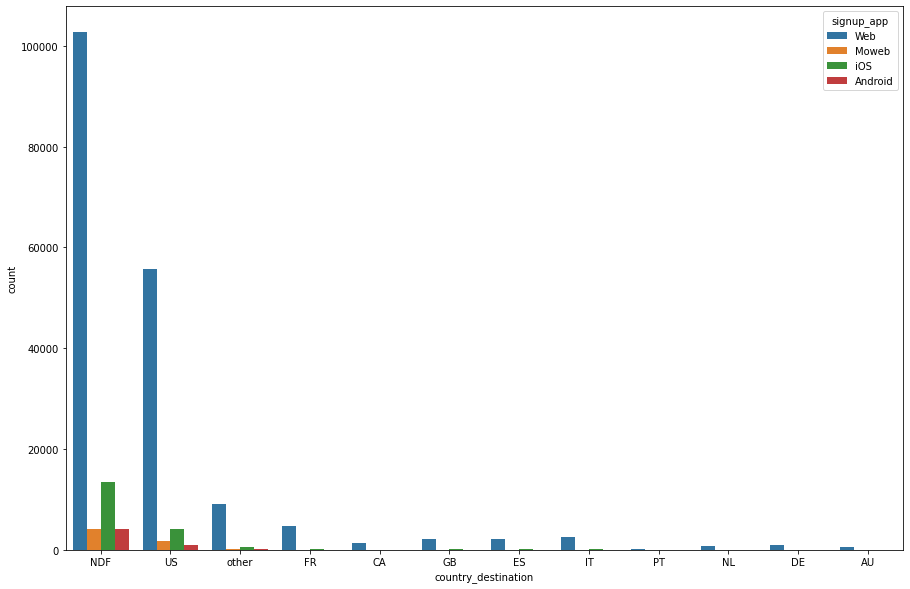

In [ ]:
sns.countplot(x='country_destination', hue='signup_app' ,data=df_train)
# people who booked from US and who hasn't booked used Web. 

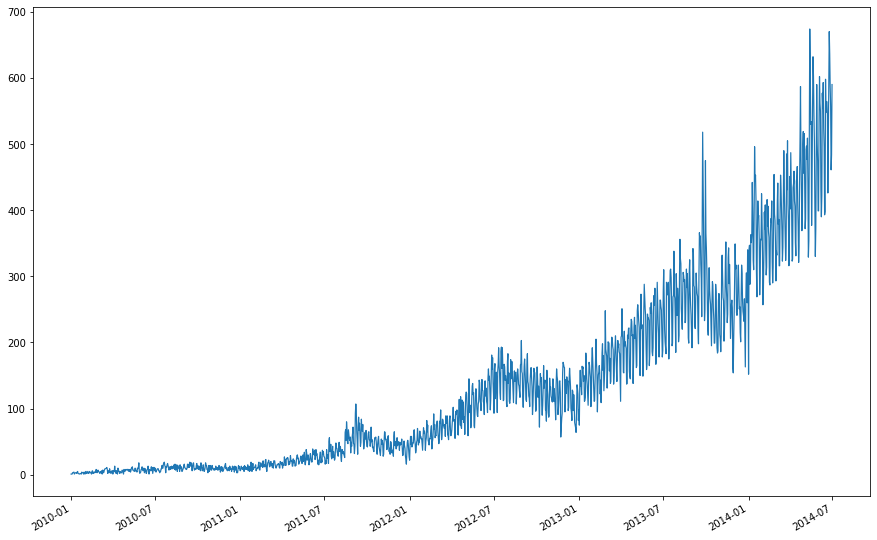

In [ ]:
df_train['date_account_created'].value_counts().plot(kind='line', linewidth=1.2)
# users increase with years

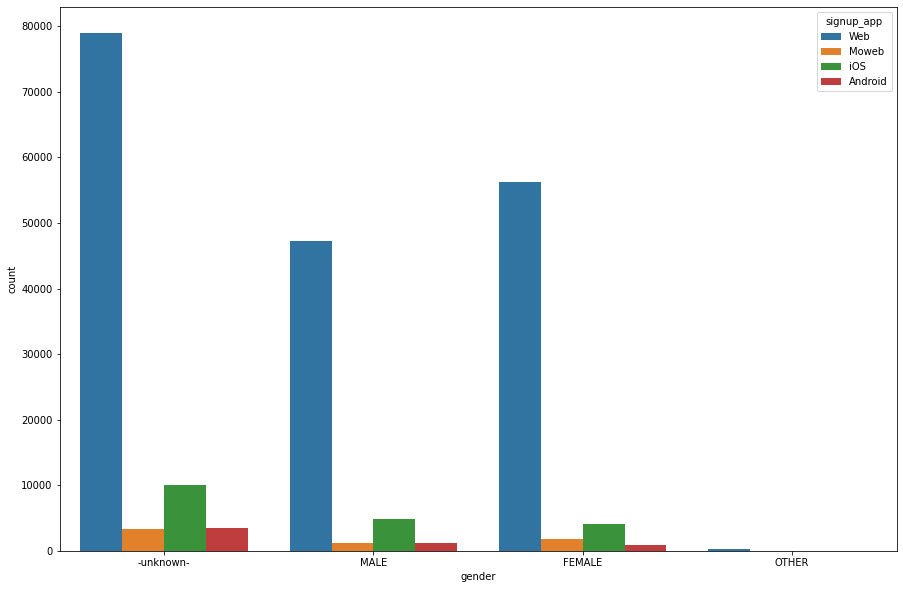

In [ ]:
sns.countplot(x='gender', hue='signup_app' ,data=df_train)
# most males and females use WEB

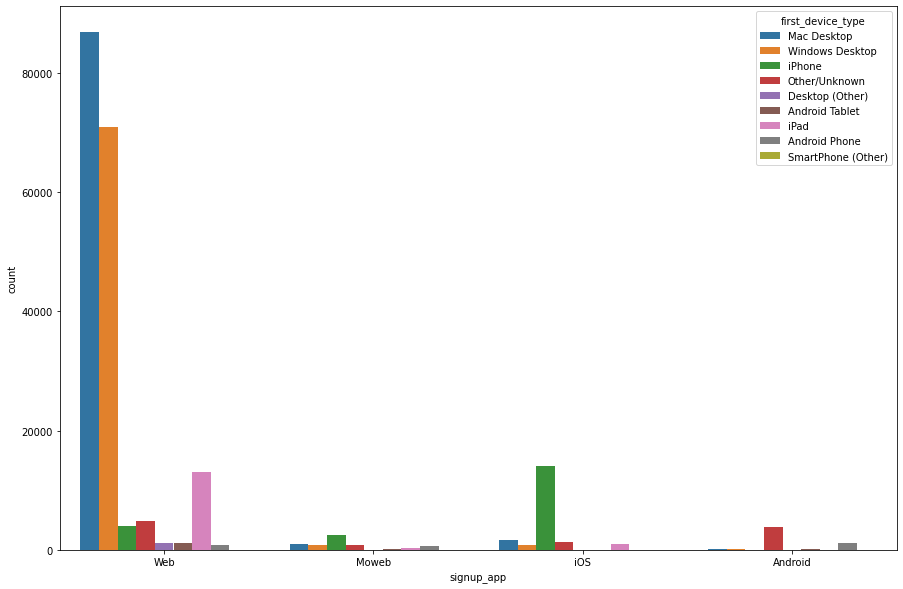

In [ ]:
sns.countplot(x='signup_app', hue='first_device_type' ,data=df_train)
# most Web users used Mac and Windows



---



---



In [ ]:
#timestamp_first_active--done
#signup_method--done
#first_device_type--done
#country_destination--done

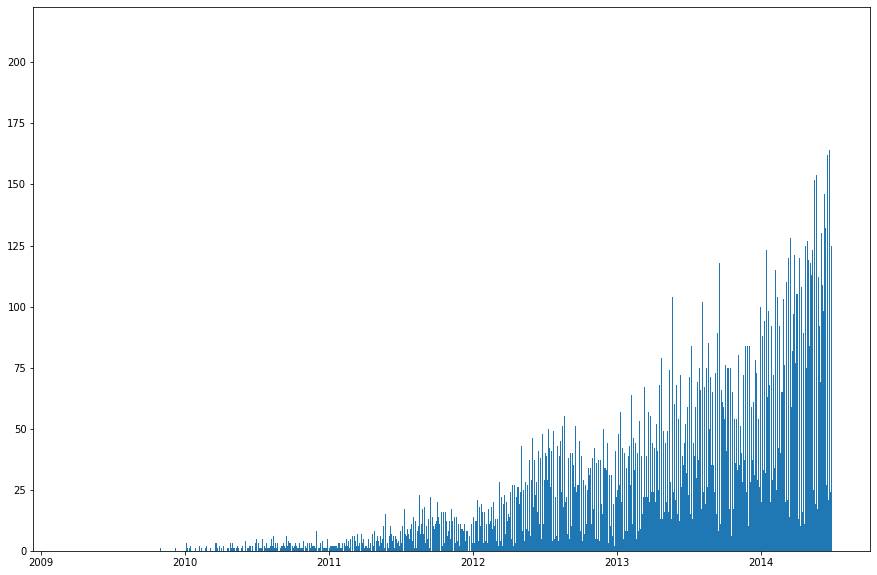

In [ ]:
plt.hist(df_train.timestamp_first_active, bins = 10000)
plt.show()

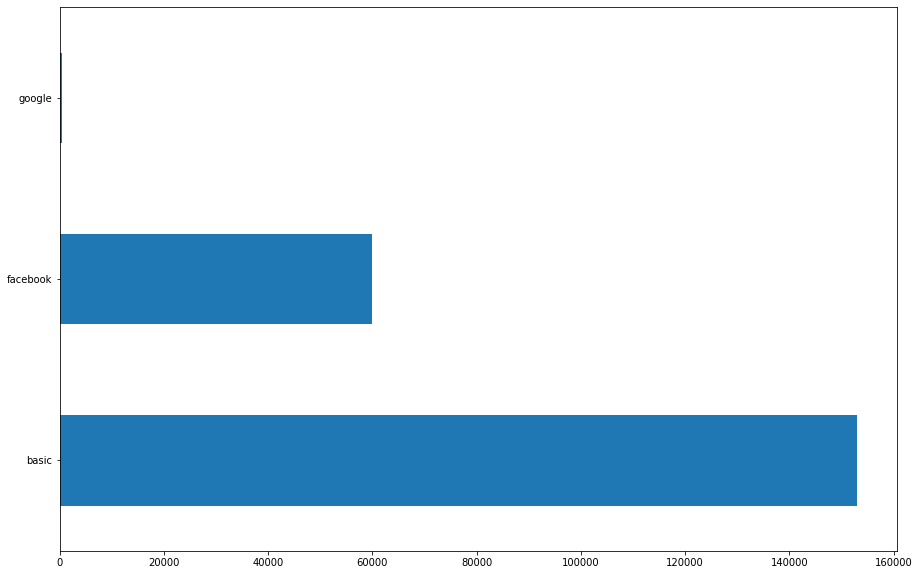

In [ ]:
signup=df_train.signup_method
f = signup.dropna(how='any',axis=0)
signup.value_counts()[:].plot(kind='barh')


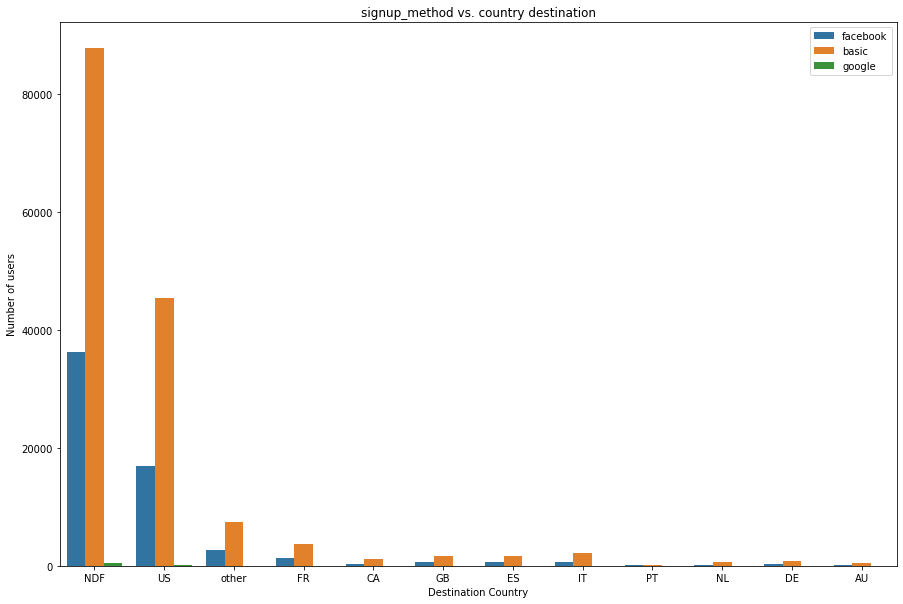

In [ ]:
abdo_data.dropna(subset = ['country_destination'])
sns.countplot(x='country_destination', data=abdo_data, hue='signup_method')
plt.title('signup_method vs. country destination')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('signup_method vs. country destination')
plt.legend(loc = 'upper right')
plt.show()
# most people who booked in Us then basic sign up then with facebook
# most people who hasn't booked signed up with basic and then facebook

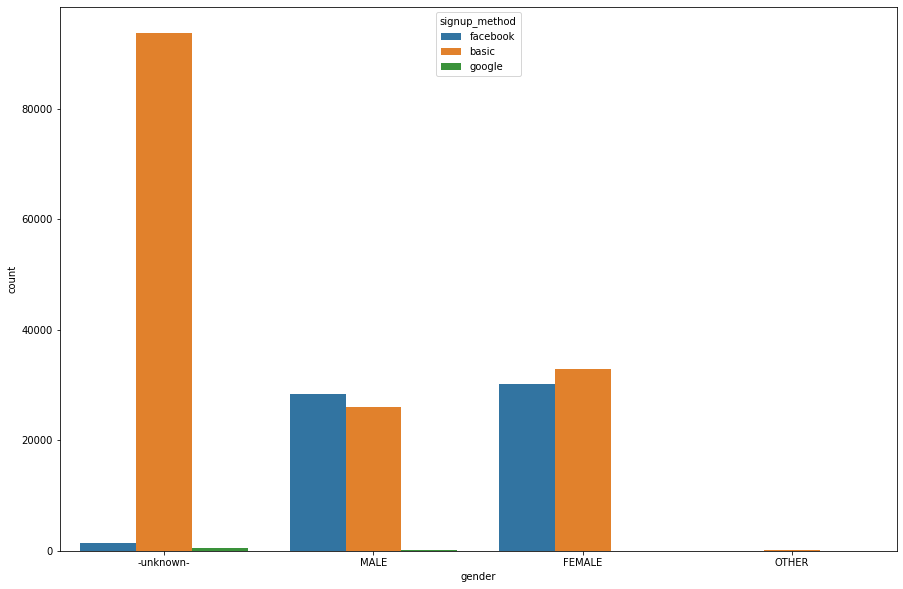

In [ ]:
sns.countplot(x='gender', hue='signup_method' ,data=df_train)

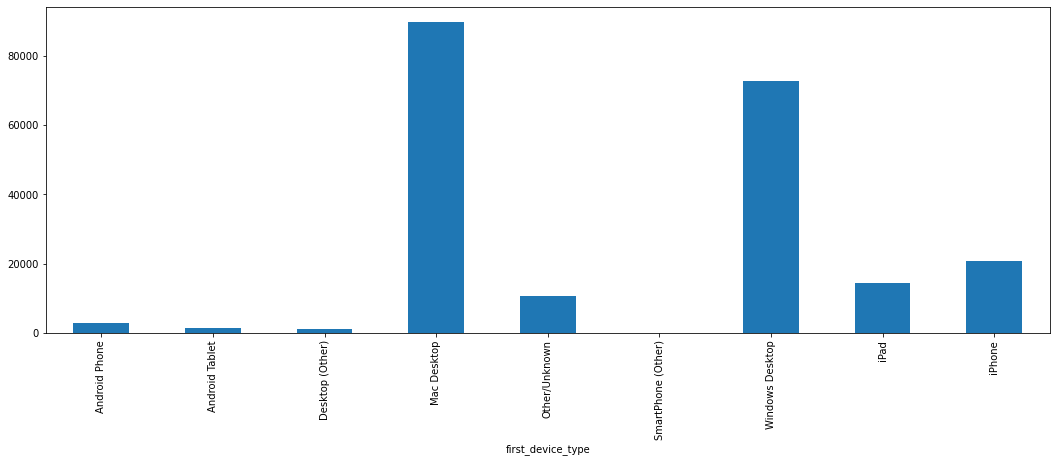

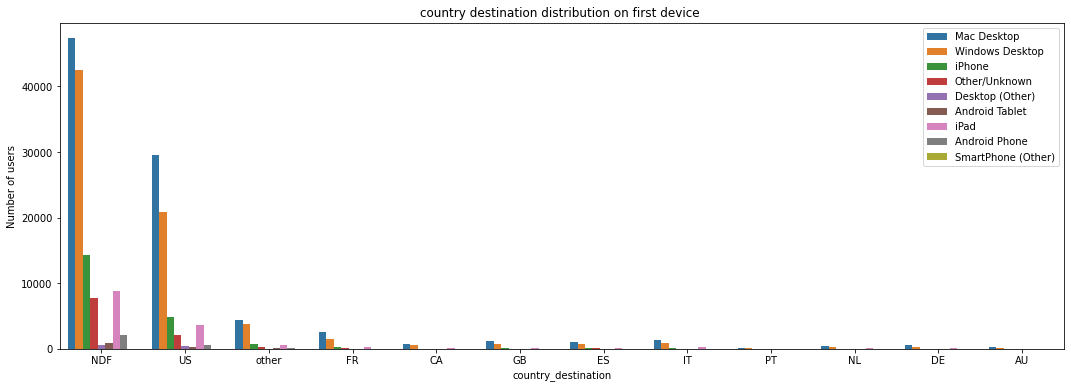

In [ ]:
plt.figure(figsize=(18,6))
abdo_data.groupby("first_device_type")['id'].count().plot.bar()
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=abdo_data, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('country destination distribution on first device ')
plt.legend(loc = 'upper right')
plt.show()

No handles with labels found to put in legend.


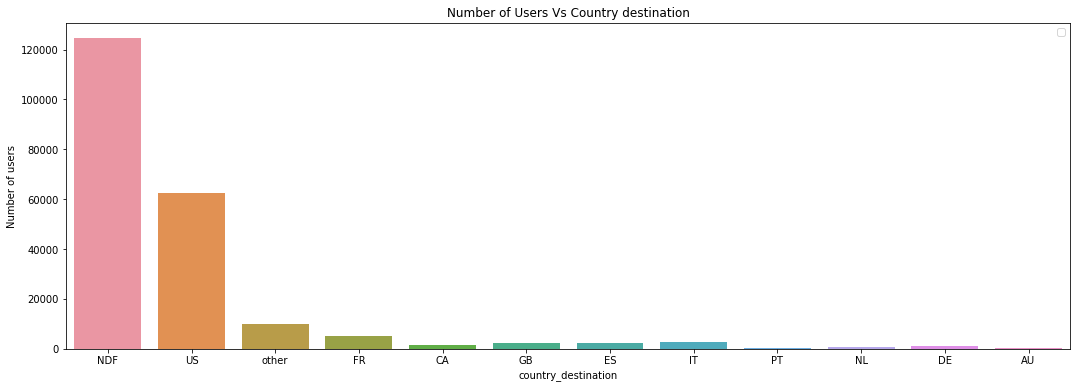

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=abdo_data)
plt.ylabel('Number of users')
plt.title('Number of Users Vs Country destination')
plt.legend(loc = 'upper right')
plt.show()



---



---



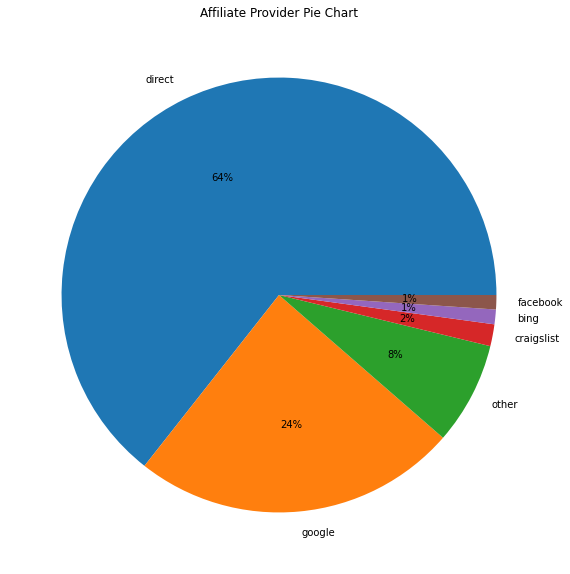

In [ ]:
#affiliate_channel        
#affiliate_provider       
#first_affiliate_tracked 

pie_data = df_train.affiliate_provider.value_counts()
pie_data['other'] += pie_data[6:].sum()
pie_data = pie_data[:6]
fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_data.index, autopct=lambda p: f'{p:.0f}%')
plt.title('Affiliate Provider Pie Chart')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()

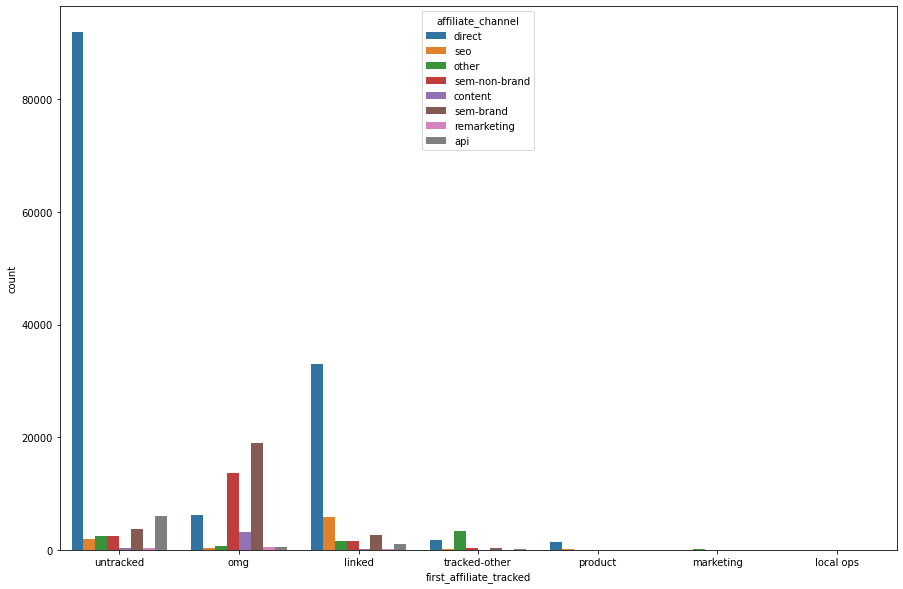

In [ ]:
sns.countplot(x='first_affiliate_tracked', hue='affiliate_channel', data=df_train)
plt.show()

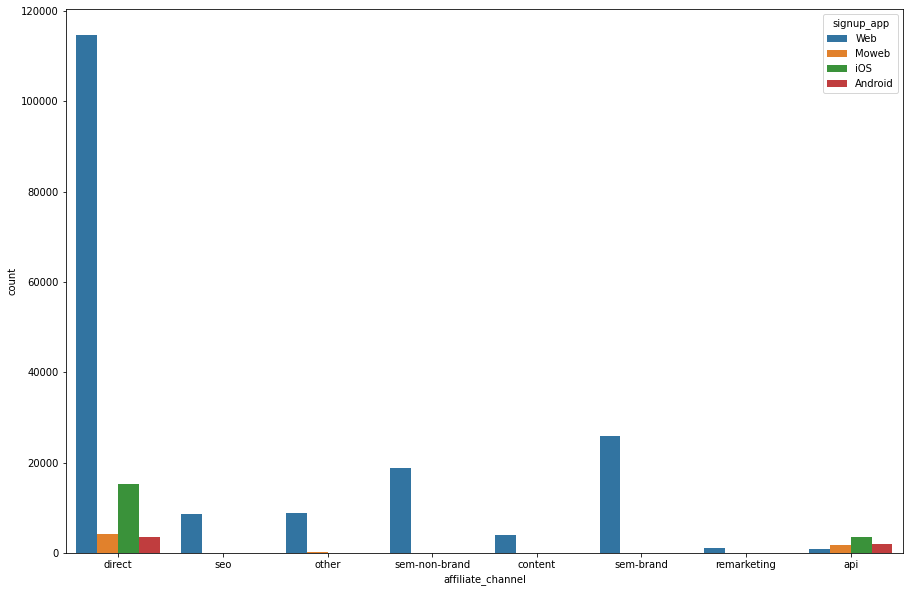

In [ ]:
sns.countplot(x='affiliate_channel', hue='signup_app', data=df_train)
plt.show()



---



---



In [ ]:
#Cells:
#Language
#Gender
#first_browser

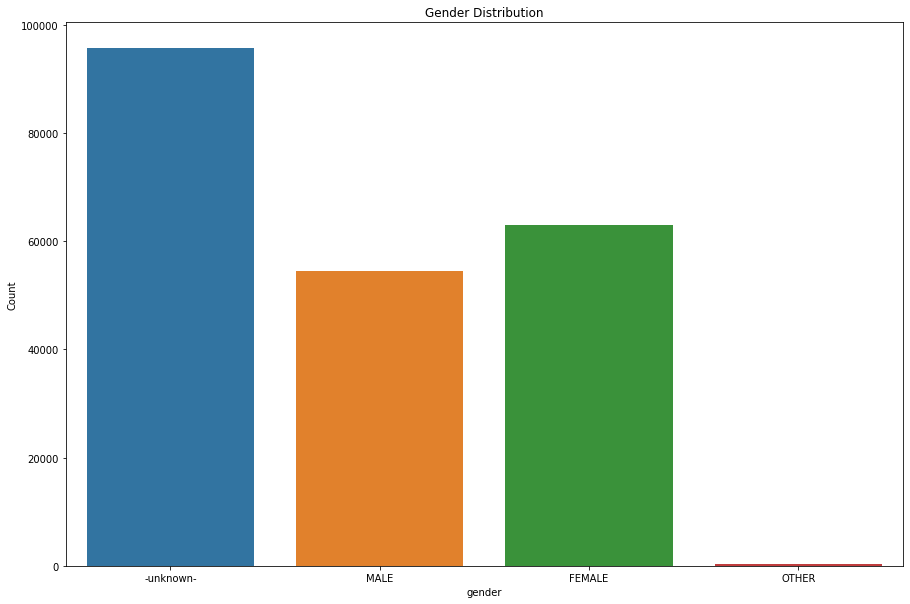

In [ ]:
sns.countplot(x='gender',data=df_train)
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [ ]:
# We can see that there is a lot of unknown gender data in this dataset
# And the gender representation between Females and Males are almost identical

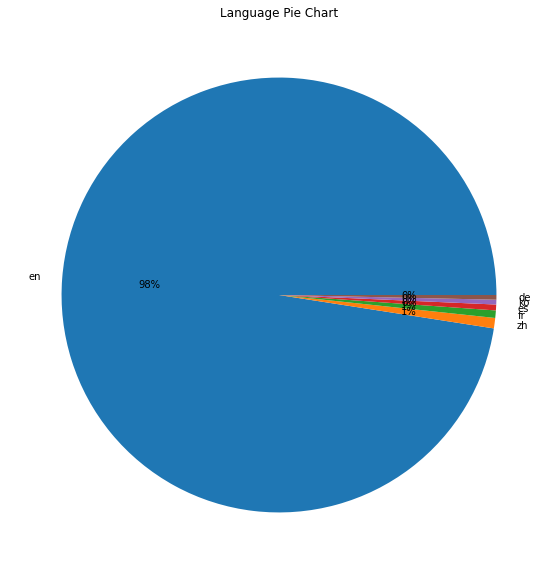

In [ ]:

pie_data = df_train.language.value_counts()
pie_data = pie_data[:6]
fig, ax = plt.subplots()
ax.pie(pie_data, labels=pie_data.index, autopct=lambda p: f'{p:.0f}%')
plt.title('Language Pie Chart')
plt.rcParams["figure.figsize"] = (15,10)
plt.show()


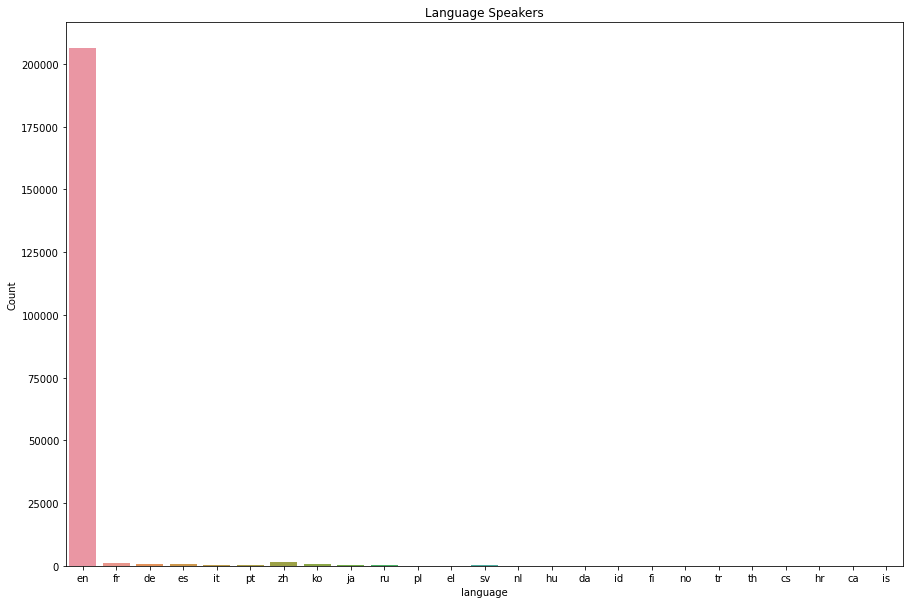

In [ ]:
sns.countplot(x='language',data=df_train)
plt.ylabel('Count')
plt.title('Language Speakers')
plt.show()


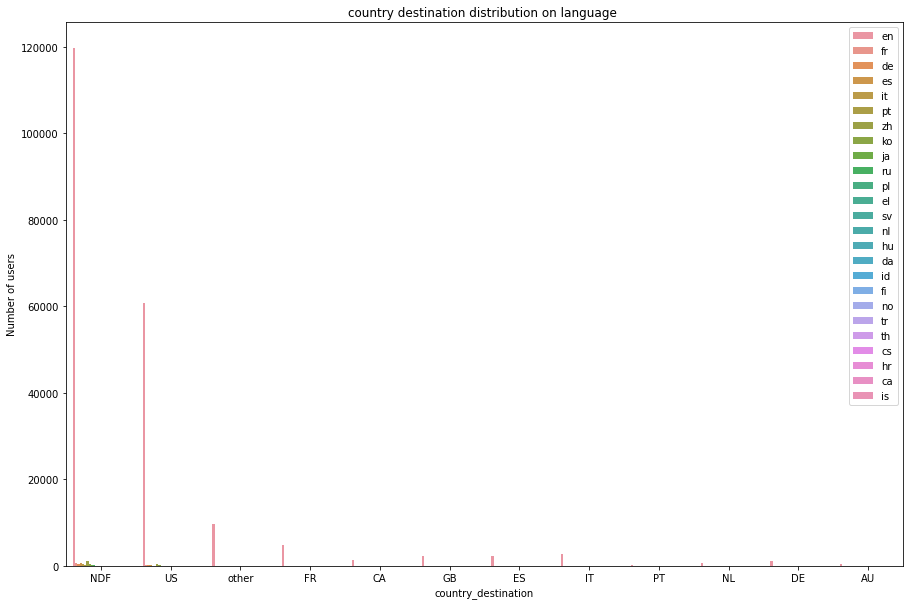

In [ ]:
sns.countplot(x='country_destination', data=df_train, hue='language')
plt.ylabel('Number of users')
plt.title('country destination distribution on language ')
plt.legend(loc = 'upper right')
plt.show()

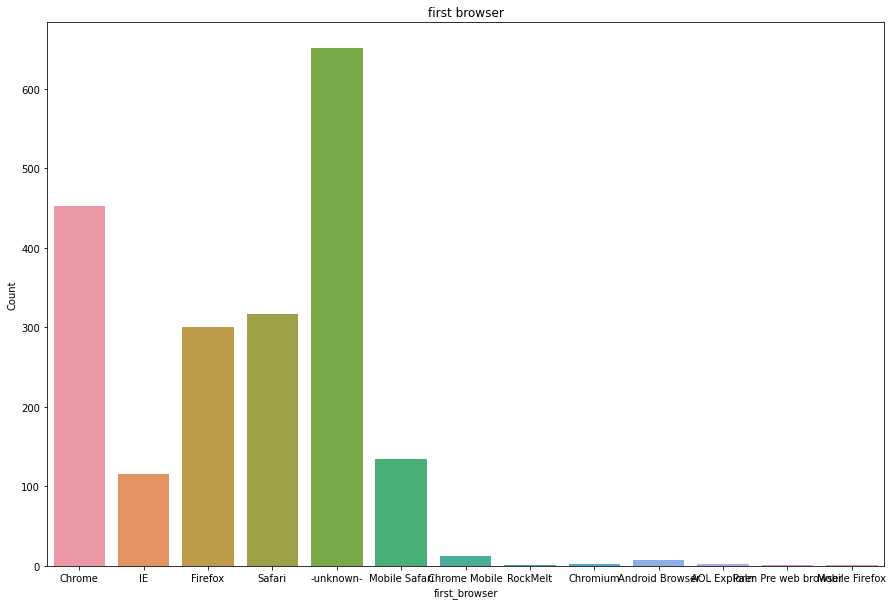

In [ ]:
sns.countplot(x='first_browser',data=df_train.head(2000))
plt.ylabel('Count')
plt.title('first browser')
plt.show()

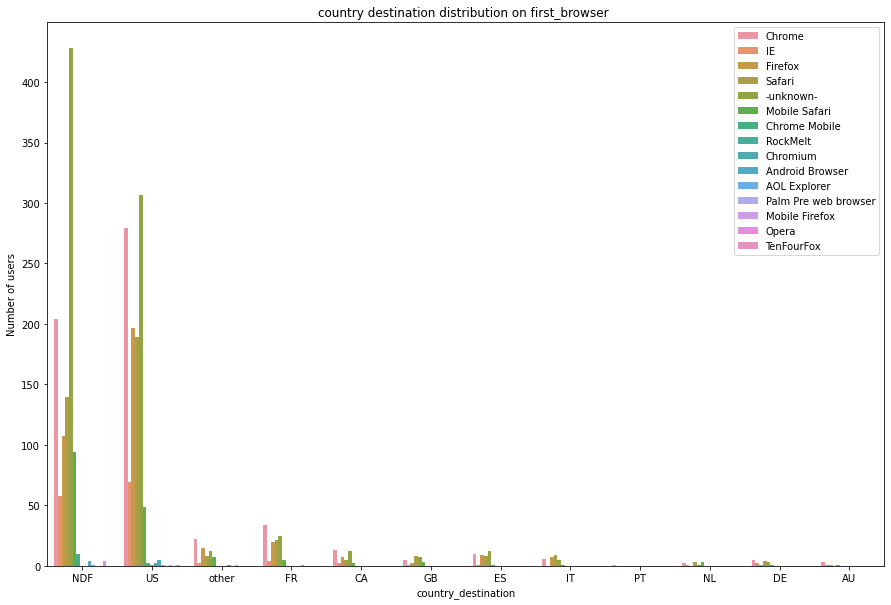

In [ ]:
sns.countplot(x='country_destination', data=df_train.head(2500), hue='first_browser')
plt.ylabel('Number of users')
plt.title('country destination distribution on first_browser ')
plt.legend(loc = 'upper right')
plt.show()

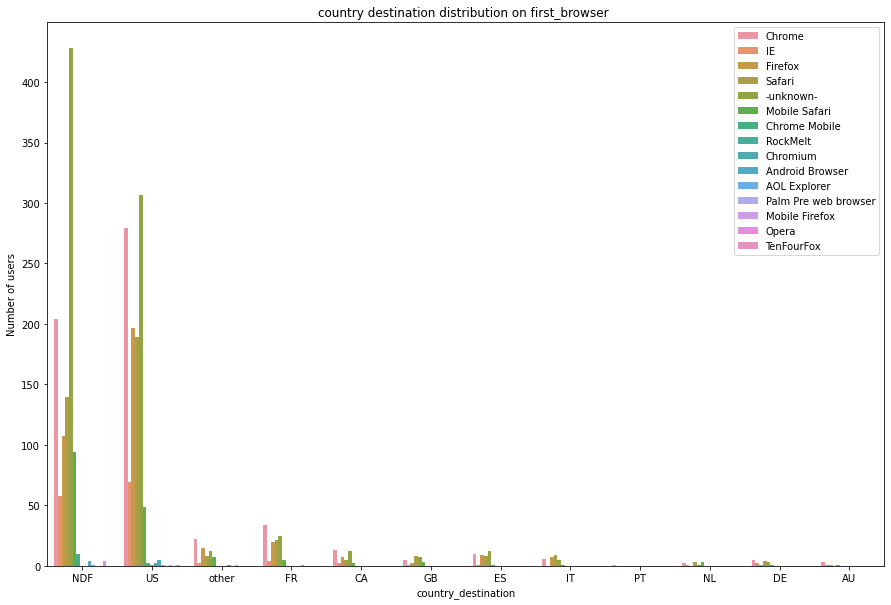

In [ ]:
sns.countplot(x='country_destination', data=df_train.head(2500), hue='first_browser')
plt.ylabel('Number of users')
plt.title('country destination distribution on first_browser ')
plt.legend(loc = 'upper right')
plt.show()



---



---





---



---



# Combining Train and Test Data before Preprocessing

In [ ]:
df_train_test = pd.concat((df_train,df_test), axis = 0, ignore_index = True)

# Data Prerocessing

In [ ]:
# Gender Preprocessing 
# 'unknown' values are considered nulls, so we'll convert them into nulls to impute this later.
df_train_test.replace('-unknown-',value=np.nan,inplace=True)
df_train_test['gender'].value_counts()
# write code below to handle nulls







FEMALE    77524
MALE      68209
OTHER       334
Name: gender, dtype: int64

In [ ]:
# date_first_booking preprocessing
df_train_test['date_first_booking'].isnull().sum()
# 124543 nulls out of 190k this feature will not be selected. so no need to handle nulls to avoid overfitting.


186639

In [ ]:
# first_affiliate_tracked Preprocessing
# first_affiliate_tracked has 6065 null values
#from first_affiliate_tracked Digram we can found that untracked is the most used value
#so we will replace all null values with untracked

df_train_test['first_affiliate_tracked'].fillna('untracked', inplace=True)
df_train_test['first_affiliate_tracked'].isnull().sum()

0

In [ ]:
# first_browser  Preprocessing

#we have about 27000 null values
#from visualization we can found that chrome is the most used value in all country distination results
#and unknown values(Nulls) cannot be predicted to any country distination
#so we will replace all null values with chrome value 
df_train_test['first_browser'].replace('-unknown-', np.nan, inplace=True)
df_train_test["first_browser"].fillna("Chrome", inplace = True)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                     129480
age                             0
signup_method                   0
signup_flow                     0
language                        1
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

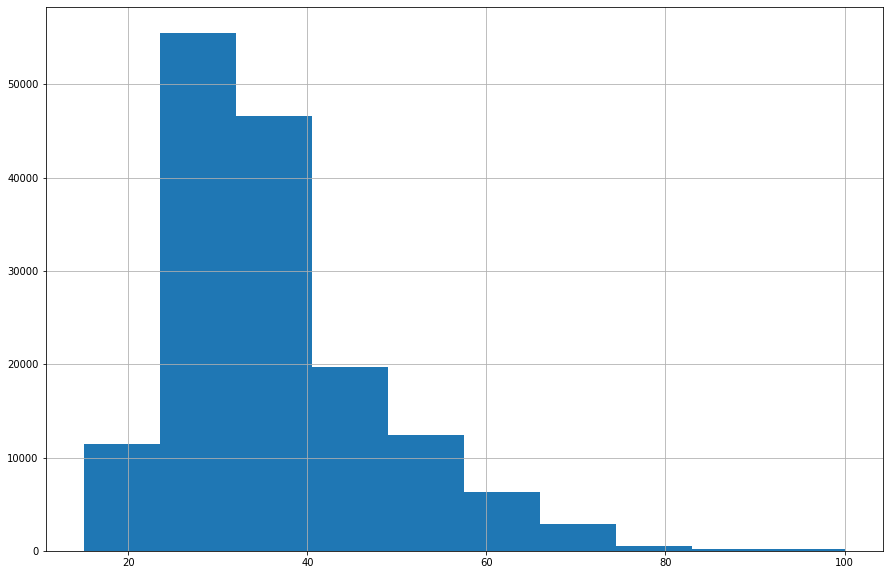

In [ ]:
# Age Preprocessing
(df_train_test['age']>150).value_counts()
#there is about 779 users entered age > 150.
#outliers detect < 14 and > 70
all = df_train_test.age.values
df_train_test['age'] = np.where(np.logical_or(all<14, all>100),np.nan, all)
df_train_test['age'].hist()
# null values now increased, let's impute .....
df_train_test['age']=df_train_test['age'].replace(np.NaN,df_train_test['age'].median())
df_train_test.isnull().sum()
# done


# Feature Engineering

In [ ]:
df_train_test['yr_date_account_created'] = df_train_test['date_account_created'].dt.year
df_train_test['m_date_account_created'] = df_train_test['date_account_created'].dt.month
df_train_test['d_date_account_created'] = df_train_test['date_account_created'].dt.day

In [ ]:
df_train_test['yr_timestamp_first_active'] = df_train_test['timestamp_first_active'].dt.year
df_train_test['m_timestamp_first_active'] = df_train_test['timestamp_first_active'].dt.month
df_train_test['d_timestamp_first_active'] = df_train_test['timestamp_first_active'].dt.day

# Dropping Unwanted Features or Feature Selection

In [ ]:
df_train_test =df_train_test.drop(['id', 'date_account_created','date_first_booking','timestamp_first_active','country_destination'], axis=1)

# Encoding Catergorical Variables

In [ ]:
# this code converts all catergical variables into numerics without the need to convert each one directly. 
# before using it, we have to make sure that there are no nulls in the variables.


features = ['gender', 'signup_method', 'signup_flow', 'language',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser']

df_train_test = pd.get_dummies(df_train_test,columns=features)

In [ ]:
df_train_test.head(20)

,age,yr_date_account_created,m_date_account_created,d_date_account_created,yr_timestamp_first_active,m_timestamp_first_active,d_timestamp_first_active,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,signup_method_weibo,signup_flow_0,signup_flow_1,signup_flow_2,signup_flow_3,signup_flow_4,signup_flow_5,signup_flow_6,signup_flow_8,signup_flow_10,signup_flow_12,signup_flow_14,signup_flow_15,signup_flow_16,signup_flow_20,signup_flow_21,signup_flow_23,signup_flow_24,signup_flow_25,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,...,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IBrowse,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_Nintendo Browser,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,33.0,2010,6,28,2009,3,19,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38.0,2011,5,25,2009,5,23,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,56.0,2010,9,28,2009,6,9,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,42.0,2011,12,5,2009,10,31,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,41.0,2010,9,14,2009,12,8,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,33.0,2010,1,1,2010,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,46.0,2010,1,2,2010,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,47.0,2010,1,3,2010,1,3,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,50.0,2010,1,4,2010,1,4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,46.0,2010,1,4,2010,1,4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Splitting Data before Training

In [ ]:
train_rows = df_train.shape[0]  
train_rows

213451

In [ ]:
all_data = df_train_test.values
X_train = all_data[:train_rows] 
X_test = all_data[train_rows:] 


# Model Creation and Training

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df_train['country_destination'].values)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Testing 

In [ ]:
predications= rf_model.predict_proba(X_test)
# predict:  predict the actual label (or class) over a new set of data.
# predict_prob: returns the class probabilities for each data point.
test_ids = df_test['id']
ids = []  
cts = [] 
for i in range(len(test_ids)):
    idx = test_ids[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(predications[i])[::-1])[:5].tolist()

data = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
data.to_csv('submission.csv',index=False)